Цель этой лабораторной работы - продемонстрировать варианты работы с гисторграммой цифрового изображения на примере создания картосхемы цветения водорослей в Чёрном море.


# Эксперименты с гистограммой

In [2]:
import os
import numpy as np 
import cv2
import matplotlib.pyplot as plt 

In [3]:
#Загрузите изображение (синий канал снимка Sentinel-2)
b2 = cv2.imread('./S2_images/2021-08-17-00_00_2021-08-17-23_59_Sentinel-2_L2A_B02_(Raw).tiff', -1)

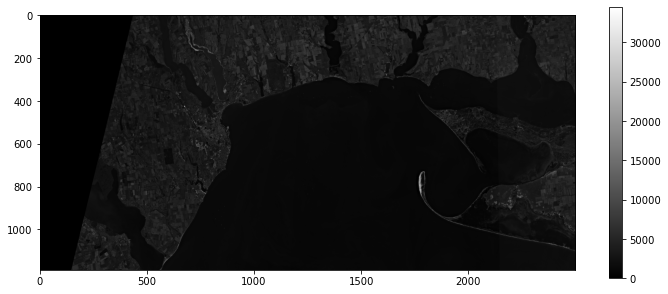

In [5]:
#Отобразите загруженный канал
plt.figure( figsize= (12,5))
plt.imshow(b2, cmap='gray')
plt.colorbar()
plt.show()

Изображение явлется массивом numpy array (матрицей), поэтому функции и методы numpy могут применяться к нему в полной мере

In [6]:
type(b2)

numpy.ndarray

In [7]:
b2.shape

(1189, 2500)

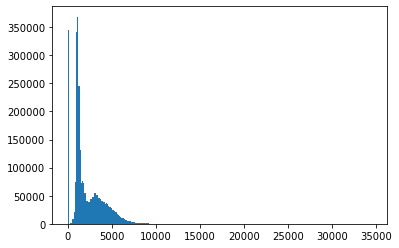

In [8]:
#Теперь построим гистограмму изображения
plt.hist(b2.ravel(), bins = 255)
plt.show()

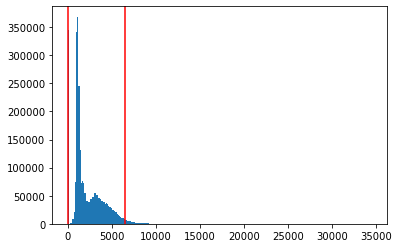

In [9]:
#Для линейного растяжения изображения между 2% и 98%, сначала вычислим их и отобразим на гистограмме.
plt.hist(b2.ravel(), bins = 255)
plt.axvline(np.percentile(b2, 2), c = 'red')
plt.axvline(np.percentile(b2, 98), c = 'red')
plt.show()

In [10]:
#Теперь заменим значения выше 98 и ниже 2%
b2_linear = b2.copy()
b2_linear[b2<np.percentile(b2, 2)] = np.percentile(b2, 2)
b2_linear[b2>np.percentile(b2, 98)] = np.percentile(b2, 98)

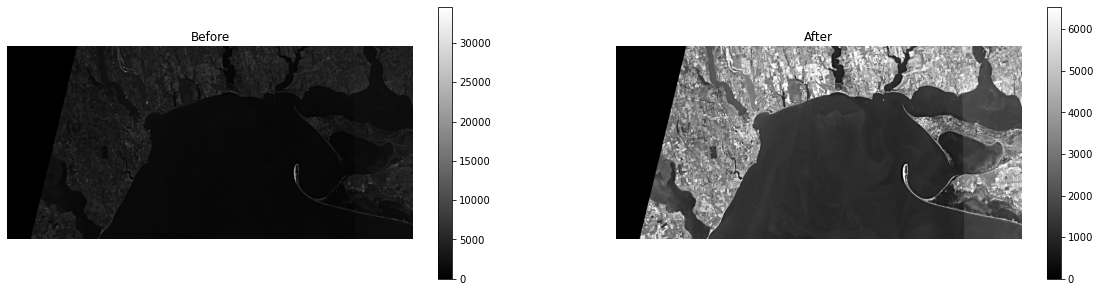

In [15]:
#Отобразим результат и сравним его с исходным
plt.figure( figsize= (20,5))
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(b2, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.subplot(1,2,2)
plt.title('After')
plt.imshow(b2_linear, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

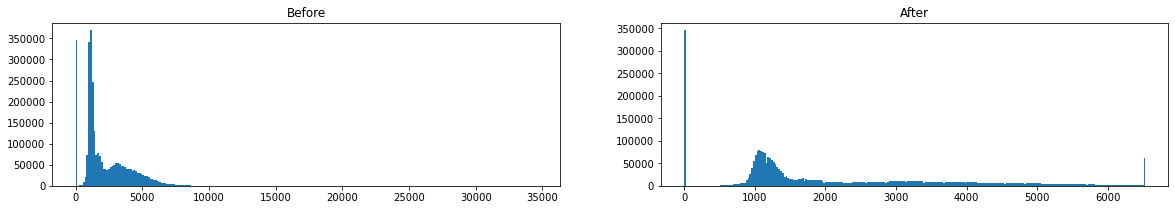

In [16]:
#Сравните гистограммы полученных изобаржений
plt.figure( figsize= (20,3))
plt.subplot(1,2,1)
plt.title('Before')
plt.hist(b2.ravel(), bins= 255)

plt.subplot(1,2,2)
plt.title('After')
plt.hist(b2_linear.ravel(), bins= 255)
plt.show()

Image looks much clearler, but we still can see only slightly brightness variances on the water surface. Lets make it brighter

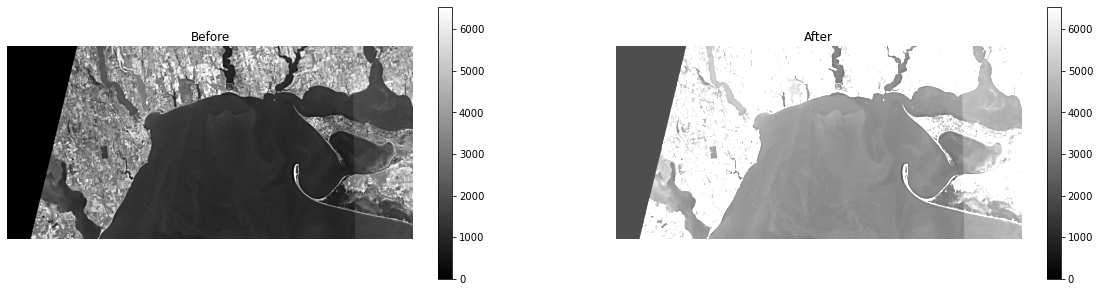

In [19]:
#Поэкспериментируйте с настройками изображниея, чтобы увидеть больше деталей на водной поверхности
#Помните, что исодное и результирующие изображения связаны y = ax+b, и a влияет на контраст, а b - на яркость
plt.figure( figsize= (20,5))
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(b2_linear, vmin=b2_linear.min(), vmax=b2_linear.max(), cmap='gray')
plt.axis('off')
plt.colorbar()
plt.subplot(1,2,2)
plt.title('After')
plt.imshow(b2_linear*1.5+2000, vmin=b2_linear.min(), vmax=b2_linear.max(), cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

vmin=b2_linear.min(), vmax=b2_linear.max(),Результат всё ещё оставляет желать лучшего
Возможно  **Эквализация гистограммы** поможет?

In [22]:
#Предварительно выполнитм квантилизацию для конвертации 16 bit в 8 bit, т.к. OpenCV может выполнить эту функцию только для 8 bit 
b2_8bit = (b2/2**8).astype('uint8')

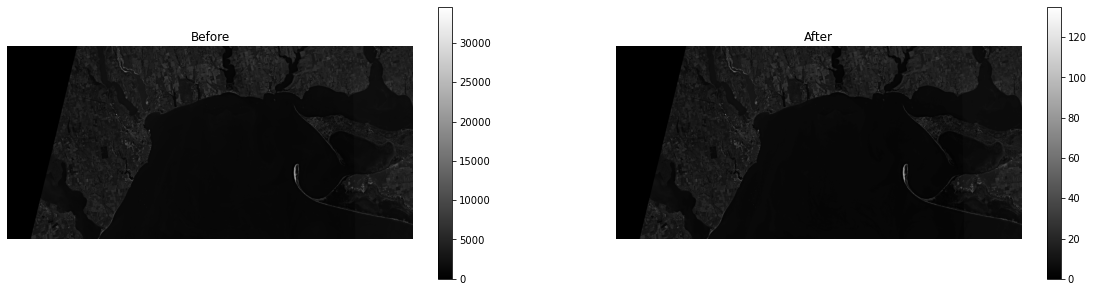

In [23]:
#Обратите внимание, что изображения выглядят идентично, но шкалы разные
plt.figure( figsize= (20,5))
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(b2,  cmap='gray')
plt.axis('off')
plt.colorbar()
plt.subplot(1,2,2)
plt.title('After')
plt.imshow(b2_8bit,  cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

In [25]:
# Собственно эквализация
b2_equal = cv2.equalizeHist(b2_8bit)

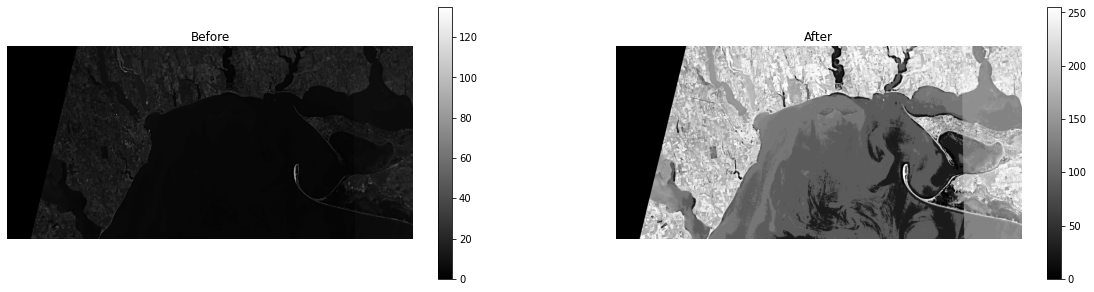

In [27]:
#Отобразите результат
plt.figure( figsize= (20,5))
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(b2_8bit,  cmap='gray')
plt.axis('off')
plt.colorbar()
plt.subplot(1,2,2)
plt.title('After')
plt.imshow(b2_equal,  cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

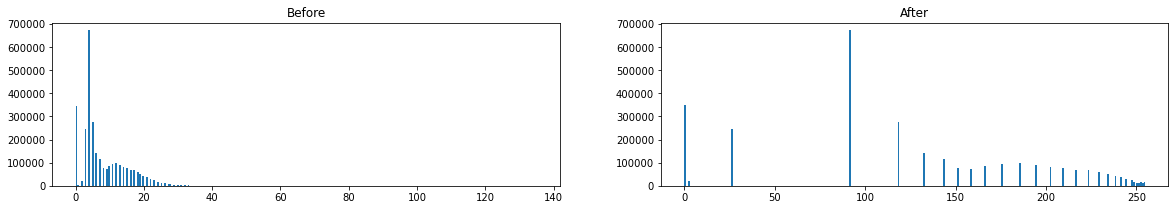

In [28]:
#Отобразите гистограммы
plt.figure( figsize= (20,3))
plt.subplot(1,2,1)
plt.title('Before')
plt.hist(b2_8bit.ravel(), bins= 255)

plt.subplot(1,2,2)
plt.title('After')
plt.hist(b2_equal.ravel(), bins= 255)
plt.show()

# Спектральные индексы и маски

Итак, изменения яркости на воде уже видны намного лучше, однако суша всё ещё мешает рассмотреть детали. Попробуем маскировать сушу с помощью порогового значения индекса NDWI и отобразить схему.

In [32]:
# Последовательно загрузите какналы B11 и B8
b3 = cv2.imread('./S2_images/2021-08-17-00_00_2021-08-17-23_59_Sentinel-2_L2A_B03_(Raw).tiff', -1)
b8 = cv2.imread('./S2_images/2021-08-17-00_00_2021-08-17-23_59_Sentinel-2_L2A_B08_(Raw).tiff', -1)

In [41]:
#Рассчитайте NDWI
ndwi = (b8-b3)/(b8+b3)

/tmp/ipykernel_19334/274039683.py:2: RuntimeWarning: invalid value encountered in true_divide
  ndwi = (b8-b3)/(b8+b3)


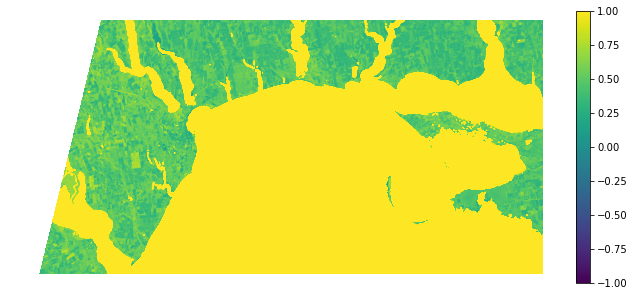

In [42]:
#Отобразите NDWI
plt.figure( figsize= (12,5))
plt.imshow(ndwi, vmin = -1, vmax = 1)
plt.axis('off')
plt.colorbar()
plt.show()

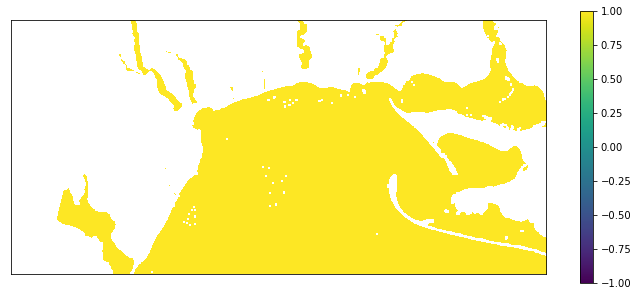

In [46]:
ndwi_masked = ndwi.copy()
#Подберите пороговое значение, позаоляющее выделить только водные объекты
mask = ndwi<0.75
ndwi_masked[mask] = np.nan
plt.figure( figsize= (12,5))
plt.imshow(ndwi_masked, vmin = -1, vmax = 1)
plt.axis('off')
plt.colorbar()
plt.show()

In [47]:
#Примените полученную маску к B2
b2_masked = b2_equal.copy()
b2_masked = b2_masked.astype('float64')
b2_masked[mask] = np.nan

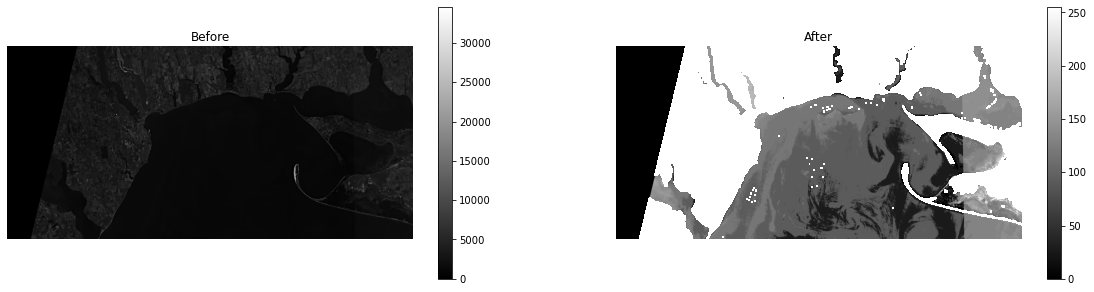

In [49]:
#Отобразите результат
plt.figure( figsize= (20,5))
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(b2, vmin = np.min(b2), vmax = np.max(b2), cmap='gray')
plt.axis('off')
plt.colorbar()
plt.subplot(1,2,2)
plt.title('After')
plt.imshow(b2_masked, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

In [50]:
#Используя код для загрузки изображений, откройте RGB (True Color) снимки
rgb = cv2.imread('./S2_images/2021-08-17-00_00_2021-08-17-23_59_Sentinel-2_L2A_True_color.tiff', -1)

In [51]:
rgb.shape

(1189, 2500, 3)

In [52]:
# Для правильного отображения, переставим каналы местами
rgb = np.stack((rgb[:,:,2], rgb[:,:,1], rgb[:,:,0]), axis = -1)

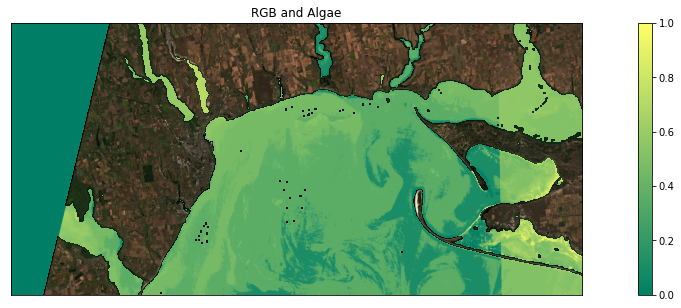

In [53]:
# Составим схему. Первым будет отрисовано цветное изображение, сверху - B2 с маской.
# Выберите цветовую схему https://matplotlib.org/3.1.3/tutorials/colors/colormaps.html
plt.figure( figsize= (20,5))

plt.title('RGB and Algae')
plt.imshow(rgb)
plt.imshow(b2_masked/255, cmap='summer')
plt.xticks([])
plt.yticks([])
plt.colorbar()
# plt.savefig("algae.png")
# files.download("algae.png") 
plt.show()

#Чтобы сохранить результат, расскоментируйте две строки выше